# Autoencoders Example 1

This is just an example of autoencoders to generate synthetica data using publicly available adult census data. <br>
Link: https://www.kaggle.com/uciml/adult-census-income

In [0]:
# Importing helping libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

# Data cleasing and normalization
First we will write a function to convert the data to numerical format.<br>
We will be usinng ***Min Max Scalar*** for Normalizing the data before feeding it to deep neural networks.<br>


In [0]:
# Upload file to files folder in colab (Free jupyter notebook environment by Google ) and extract using pandas
df = pd.read_csv('census_data_modified.csv')

# Check mean and standard deviations to help how the data distribution for each attribute
print(df.describe())

# Summarize missing values
print('\n\nNull values by variable:')
print(df.isnull().sum())

# Check datatypes of each attribute
print('\n\nData types for each attribute:')
print(df.dtypes)

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  30162.000000  3.016200e+04   30162.000000  30162.000000  30162.000000   
mean      38.437902  1.897938e+05      10.121312   1092.007858     88.372489   
std       13.134665  1.056530e+05       2.549995   7406.346497    404.298370   
min       17.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176272e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.784250e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.376285e+05      13.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    30162.000000  
mean        40.931238  
std         11.979984  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


Null values by variable:
age               0
workclass       

In [0]:
# Pre-processing and cleaning dataset
def pre_process_data(dataset):
    dataset_new = dataset.copy()
    dataset_new.dropna()

    columns = dataset_new.columns.values

    for column in columns:
        text_digit_values = {}

        def convert_to_int(val):
            return text_digit_values[val]

        if dataset_new[column].dtype != np.int64 and dataset_new[column].dtype != np.float64:
            column_contents = dataset[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_values:
                    text_digit_values[unique] = x
                    x += 1
            dataset_new[column] = list(map(convert_to_int, dataset[column]))
    return dataset_new

In [0]:
# Run the above function to get numerical dataset
df_new = pre_process_data(df)

In [0]:
# Normalizing/Standardizing data
scalar = MinMaxScaler()
df_new_scaled = scalar.fit_transform(df_new)
df_new_scaled = pd.DataFrame(df_new_scaled, columns = df_new.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Data Visualization
We will visualize data in terms of each attribute against class labels and check overlapping using .hist function provided by Pandas.<br>

In [0]:
# Data Visualization
def visualize_data():
  fig, axes = plt.subplots(nrows=2, ncols=14, figsize=(100, 7))
  print("1 refers to income <=50K \n0 refers to income >50K")
  df_new.groupby('income').age.hist(alpha=0.4, ax=axes[0,0], grid=True)
  df_new.groupby('income').age.plot(kind='kde', ax=axes[1,0], grid=True, legend=True, x='Age', y='Count')
  
  
  df_new.groupby('income').workclass.hist(alpha=0.4, ax=axes[0,1], grid=True)
  df_new.groupby('income').workclass.plot(kind='kde', ax=axes[1,1], grid=True, legend=True)
  
  df_new.groupby('income').fnlwgt.hist(alpha=0.4, ax=axes[0,2], grid=True)
  df_new.groupby('income').fnlwgt.plot(kind='kde', ax=axes[1,2], grid=True, legend=True)
  
  df_new.groupby('income').education.hist(alpha=0.4, ax=axes[0,3], grid=True)
  df_new.groupby('income').education.plot(kind='kde', ax=axes[1,3], grid=True, legend=True)
  
  df_new.groupby('income').education_num.hist(alpha=0.4, ax=axes[0,4], grid=True)
  df_new.groupby('income').education_num.plot(kind='kde', ax=axes[1,4], grid=True, legend=True)
  
  df_new.groupby('income').marital_status.hist(alpha=0.4, ax=axes[0,5], grid=True)
  df_new.groupby('income').marital_status.plot(kind='kde', ax=axes[1,5], grid=True, legend=True)
  
  df_new.groupby('income').occupation.hist(alpha=0.4, ax=axes[0,6], grid=True)
  df_new.groupby('income').occupation.plot(kind='kde', ax=axes[1,6], grid=True, legend=True)
  
  df_new.groupby('income').relationship.hist(alpha=0.4, ax=axes[0,7], grid=True)
  df_new.groupby('income').relationship.plot(kind='kde', ax=axes[1,7], grid=True, legend=True)
  
  df_new.groupby('income').race.hist(alpha=0.4, ax=axes[0,8], grid=True)
  df_new.groupby('income').race.plot(kind='kde', ax=axes[1,8], grid=True, legend=True)
  
  df_new.groupby('income').sex.hist(alpha=0.4, ax=axes[0,9], grid=True)
  df_new.groupby('income').sex.plot(kind='kde', ax=axes[1,9], grid=True, legend=True)
  
  df_new.groupby('income').capital_gain.hist(alpha=0.4, ax=axes[0,10], grid=True)
  df_new.groupby('income').capital_gain.plot(kind='kde', ax=axes[1,10], grid=True, legend=True)
  
  df_new.groupby('income').capital_loss.hist(alpha=0.4, ax=axes[0,11], grid=True)
  df_new.groupby('income').capital_loss.plot(kind='kde', ax=axes[1,11], grid=True, legend=True)
  
  df_new.groupby('income').hours_per_week.hist(alpha=0.4, ax=axes[0,12], grid=True)
  df_new.groupby('income').hours_per_week.plot(kind='kde', ax=axes[1,12], grid=True, legend=True)
  
  df_new.groupby('income').native_country.hist(alpha=0.4, ax=axes[0,13], grid=True)
  df_new.groupby('income').native_country.plot(kind='kde', ax=axes[1,13], grid=True, legend=True)

1 refers to income <=50K 
0 refers to income >50K


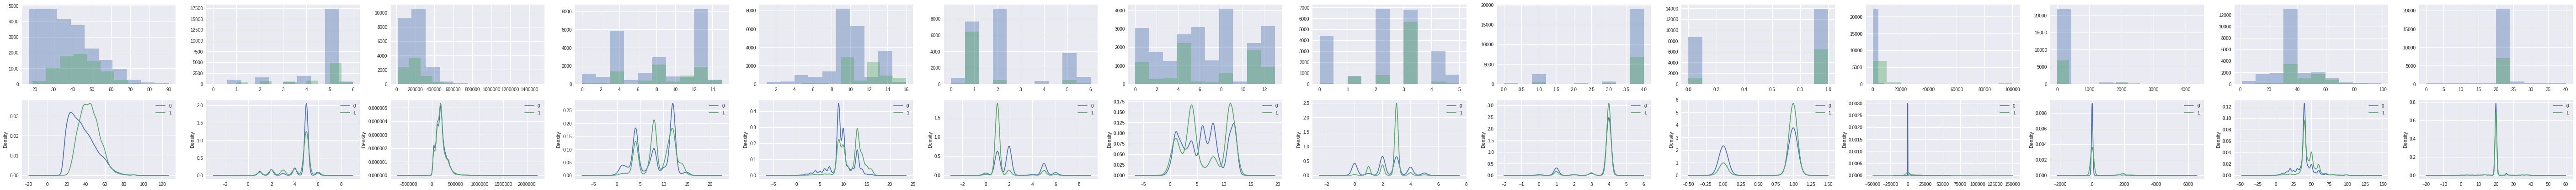

In [0]:
# Run above function to visualize data
visualize_data()

# Split the dataset
We will split the entire dataset into two for training and testing pupose.<br>
for this we will be using preprocessing function offered by sklearn.

In [0]:
# Split features and labels from dataset. X refers to feature set and y refers to target attribute
X = df_new_scaled.iloc[:, :14]
y = df_new_scaled.iloc[:, 14:]

# Check whether the attributes are split correctly
print(X.columns)
print(y.columns)

# Check shape of the data
print(X.shape, y.shape)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')
Index(['income'], dtype='object')
(30162, 14) (30162, 1)


In [0]:
# Split dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 121)

# Check the shape of each split set
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(24129, 14) (6033, 14) (24129, 1) (6033, 1)


In [0]:
# Convert all values to float32
x_train = x_train.values.astype('float32')
x_test = x_test.values.astype('float32')
y_train = y_train.values.astype('float32')
y_test = y_test.values.astype('float32')

# Converting data to tensors
We need to provide data in form of tensors. Hence we need to reshape the data.

In [0]:
# Reshape option allows us to provide shape of tensors
x_train = x_train.reshape(x_train.shape[0], 14)
x_test = x_test.reshape(x_test.shape[0], 14)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

# Check shape of data
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(24129, 14) (6033, 14) (24129, 1) (6033, 1)


# Autoencoder structure
There are **4 hyperparameters** that we need to set before training an autoencoder:

**Code size:** number of nodes in the middle layer. Smaller size results in more compression.<br>
**Number of layers:** the autoencoder can be as deep as we like. In the figure above we have 2 layers in both the encoder and decoder, without considering the input and output.<br>
**Number of nodes per layer:** the autoencoder architecture we’re working on is called a stacked autoencoder since the layers are stacked one after another. Usually stacked autoencoders look like a “sandwitch”. The number of nodes per layer decreases with each subsequent layer of the encoder, and increases back in the decoder. Also the decoder is symmetric to the encoder in terms of layer structure. As noted above this is not necessary and we have total control over these parameters.<br>
**Loss function:** we either use mean squared error (mse) or binary crossentropy. If the input values are in the range [0, 1] then we typically use crossentropy, otherwise we use the mean squared error.<br><br>

Reference link for above text: https://goo.gl/PNfJSw

In [0]:
# Hyper parameters
inp_size = 14
hidden_1 = 7
hidden_2 = 4
b_size = 2000 # Batch size
epc = 500 # Epochs

In [0]:
# Setting input shape
inp = tf.keras.Input(shape=(inp_size,))

# Check shape of input
print(inp.shape)

(?, 14)


In [0]:
# Setting layers for autoencoders
encoded = tf.keras.layers.Dense(units = hidden_1, activation='relu')(inp)
encoded = tf.keras.layers.Dense(units = hidden_2, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(units = hidden_1, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(units = inp_size, activation='sigmoid')(decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Autoencoder and encoder
autoencoder = tf.keras.Model(inp, decoded)
encoder = tf.keras.Model(inp, encoded)

# Check summary
autoencoder.summary()
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 14)                0         
_________________________________________________________________
dense (Dense)                (None, 7)                 105       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 32        
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 35        
_________________________________________________________________
dense_3 (Dense)              (None, 14)                112       
Total params: 284
Trainable params: 284
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (Inp

In [0]:
# Autoencoder training
# Compile and autoencoder
autoencoder.compile(optimizer='adam',
                    loss=tf.keras.losses.categorical_crossentropy,
                    metrics=['accuracy'])

# Fit an autoencoder 
autoencoder.fit(x_train, x_train,
                batch_size = b_size,
                epochs = epc)
# You can also input validation_data=(x_test, x_test) to fit the model

In [0]:
# Once the data is trained, its time to predict the data
predicted = autoencoder.predict(X)
print(predicted)
print(predicted.shape)